<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Machine-Learning-models-sans-Packages-/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source :https://medium.com/@waadlingaadil/learn-to-build-a-neural-network-from-scratch-yes-really-cac4ca457efc

# **heart desease example**

building the neural network

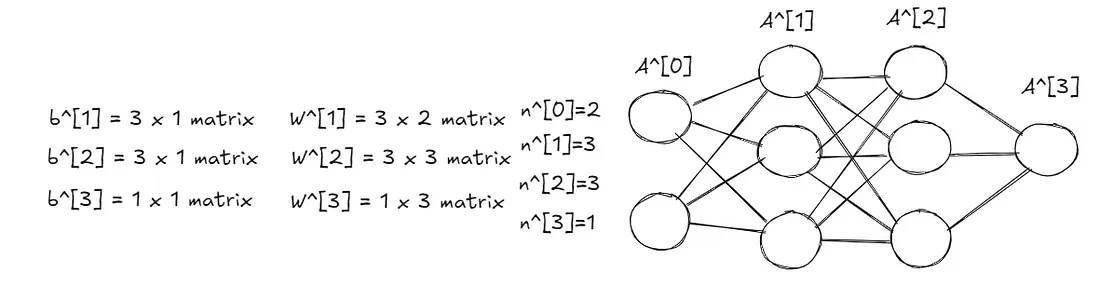

In [ ]:
n = [2, 3, 3, 1]#number of nodes on each layer
print("layer 0 / input layer size", n[0])
print("layer 1 size", n[1])
print("layer 2 size", n[2])
print("layer 3 size", n[3])




layer 0 / input layer size 2
layer 1 size 3
layer 2 size 3
layer 3 size 1


randomize weigths and biases

In [ ]:
import numpy as np

W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)


In [ ]:
print("Weights for layer 1 shape:", W1.shape)
print("Weights for layer 2 shape:", W2.shape)
print("Weights for layer 3 shape:", W3.shape)
print("bias for layer 1 shape:", b1.shape)
print("bias for layer 2 shape:", b2.shape)
print("bias for layer 3 shape:", b3.shape)
print("The .shape property for matrices describes the dimensions of the matrix and returns an ordered pair called a tuple, in the form of (rows, columns).")

Weights for layer 1 shape: (3, 2)
Weights for layer 2 shape: (3, 3)
Weights for layer 3 shape: (1, 3)
bias for layer 1 shape: (3, 1)
bias for layer 2 shape: (3, 1)
bias for layer 3 shape: (1, 1)
The .shape property for matrices describes the dimensions of the matrix and returns an ordered pair called a tuple, in the form of (rows, columns).


input data

In [ ]:
X = np.array([
    [150, 70], #150 pounds, 70 inches tall.
    [254, 73],
    [312, 68],
    [120, 60],
    [154, 61],
    [212, 65],
    [216, 67],
    [145, 67],
    [184, 64],
    [130, 69]
])

print(X.shape) #  (10, 2)

(10, 2)


transpose data for feed forward

In [ ]:
A0 = X.T
print(A0.shape) #  (2, 10)

(2, 10)


output data (0 or 1)

In [ ]:
y = np.array([
    0,  # no risk for cardiovascular disease.
    1,
    1, # risk is imminent
    0,
    0,
    1,
    1,
    0,
    1,
    0
])
m = 10

# we need to reshape to a n^[3] x m matrix
Y = y.reshape(n[3], m)

print("The .reshape() method on a matrix allows us to reshape the matrix to any dimensions we want by passing the rows and columns like matrix.reshape(rows, columns")
Y.shape




The .reshape() method on a matrix allows us to reshape the matrix to any dimensions we want by passing the rows and columns like matrix.reshape(rows, columns


(1, 10)

activation function

In [ ]:
def g(arr):#sigmoid
  return 1 / (1 + np.exp(-1 * arr))

the feed forward process

In [ ]:
def feed_forward(A0):
  # layer 1 calculations
  Z1 = W1 @ A0 + b1
  A1 = g(Z1)

  # layer 2 calculations
  Z2 = W2 @ A1 + b2
  A2 = g(Z2)

  # layer 3 calculations
  Z3 = W3 @ A2 + b3
  A3 = g(Z3)

  cache = {
      "A0": A0,
      "A1": A1,
      "A2": A2
  }

  return A3, cache

In [ ]:


print("layer 1 output shape", A1.shape)
print("layer 2 output shape", A2.shape)
print("layer 3 output shape", A3.shape)


y_hat = A3   # model prediction


print("predictions values", y_hat)

layer 1 output shape (3, 10)
layer 2 output shape (3, 10)
layer 3 output shape (1, 10)
predictions values [[0.31226272 0.31227241 0.25355342 0.31226272 0.31226272 0.31226285
  0.31226276 0.31226272 0.31226272 0.31226272]]


prediction values show the inability of the model to predict correctly the risk of heart desease (2-3 out of 10 are correct).
there is a need to imrove.

Cost calculations

In [ ]:
def cost(y_hat,y):
  losses= -1 * (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
  m = y_hat.reshape(-1).shape[0]


  summed_losses = np.sum(losses, axis=1)/ m
  return np.sum(summed_losses)


In [ ]:
cost(y_hat,Y)

0.7899532615121323

 backpropagation


In [ ]:
def backprop_layer_3(y_hat, Y, m, A2, W3):
  A3 = y_hat

  # step 1. calculate dC/dZ3 using shorthand we derived earlier
  dC_dZ3 = (1/m) * (A3 - Y)
  assert dC_dZ3.shape == (n[3], m)


  # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3
  #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
  dZ3_dW3 = A2
  assert dZ3_dW3.shape == (n[2], m)

  dC_dW3 = dC_dZ3 @ dZ3_dW3.T
  assert dC_dW3.shape == (n[3], n[2])

  # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
  dC_db3 = np.sum(dC_dZ3, axis=1, keepdims=True)
  assert dC_db3.shape == (n[3], 1)

  # step 4. calculate propagator dC/dA2 = dC/dZ3 * dZ3/dA2
  dZ3_dA2 = W3
  dC_dA2 = W3.T @ dC_dZ3
  assert dC_dA2.shape == (n[2], m)

  return dC_dW3, dC_db3, dC_dA2




In [ ]:
def backprop_layer_2(propagator_dC_dA2, A1, A2, W2):

  # step 1. calculate dC/dZ2 = dC/dA2 * dA2/dZ2

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA2_dZ2 = A2 * (1 - A2)
  dC_dZ2 = propagator_dC_dA2 * dA2_dZ2
  assert dC_dZ2.shape == (n[2], m)


  # step 2. calculate dC/dW2 = dC/dZ2 * dZ2/dW2
  dZ2_dW2 = A1
  assert dZ2_dW2.shape == (n[1], m)

  dC_dW2 = dC_dZ2 @ dZ2_dW2.T
  assert dC_dW2.shape == (n[2], n[1])

  # step 3. calculate dC/db2 = np.sum(dC/dZ2, axis=1, keepdims=True)
  dC_db2 = np.sum(dC_dW2, axis=1, keepdims=True)
  assert dC_db2.shape == (n[2], 1)

  # step 4. calculate propagator dC/dA1 = dC/dZ2 * dZ2/dA1
  dZ2_dA1 = W2
  dC_dA1 = W2.T @ dC_dZ2
  assert dC_dA1.shape == (n[2], m)

  return dC_dW2, dC_db2, dC_dA1

def backprop_layer_1(propagator_dC_dA1, A1, A0, W1):

  # step 1. calculate dC/dZ1 = dC/dA1 * dA1/dZ1

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA1_dZ1 = A1 * (1 - A1)
  dC_dZ1 = propagator_dC_dA1 * dA1_dZ1
  assert dC_dZ1.shape == (n[1], m)


  # step 2. calculate dC/dW1 = dC/dZ1 * dZ1/dW1
  dZ1_dW1 = A0
  assert dZ1_dW1.shape == (n[0], m)

  dC_dW1 = dC_dZ1 @ dZ1_dW1.T
  assert dC_dW1.shape == (n[1], n[0])

  # step 3. calculate dC/db1 = np.sum(dC/dZ1, axis=1, keepdims=True)
  dC_db1 = np.sum(dC_dW1, axis=1, keepdims=True)
  assert dC_db1.shape == (n[1], 1)

  return dC_dW1, dC_db1

training

In [ ]:
def train():
  # must use global keyword in order to modify global variables
  global W3, W2, W1, b3, b2, b1

  epochs = 1000 # training for 1000 iterations
  alpha = 0.1 # set learning rate to 0.1
  costs = [] # list to store costs

  for e in range(epochs):
    # 1. FEED FORWARD
    y_hat, cache = feed_forward(A0)

    # 2. COST CALCULATION
    error = cost(y_hat, Y)
    costs.append(error)

    # 3. BACKPROP CALCULATIONS

    dC_dW3, dC_db3, dC_dA2 = backprop_layer_3(
        y_hat,
        Y,
        m,
        A2= cache["A2"],
        W3=W3
    )

    dC_dW2, dC_db2, dC_dA1 = backprop_layer_2(
        propagator_dC_dA2=dC_dA2,
        A1=cache["A1"],
        A2=cache["A2"],
        W2=W2
    )

    dC_dW1, dC_db1 = backprop_layer_1(
        propagator_dC_dA1=dC_dA1,
        A1=cache["A1"],
        A0=cache["A0"],
        W1=W1
    )

    # 4. UPDATE WEIGHTS
    W3 = W3 - (alpha * dC_dW3)
    W2 = W2 - (alpha * dC_dW2)
    W1 = W1 - (alpha * dC_dW1)

    b3 = b3 - (alpha * dC_db3)
    b2 = b2 - (alpha * dC_db2)
    b1 = b1 - (alpha * dC_db1)


    if e % 20 == 0:
      print(f"epoch {e}: cost = {error:4f}")

  return costs

In [ ]:
costs = train()


epoch 0: cost = 0.691713
epoch 20: cost = 0.681991
epoch 40: cost = 0.674948
epoch 60: cost = 0.668227
epoch 80: cost = 0.661256
epoch 100: cost = 0.642087
epoch 120: cost = 0.629155
epoch 140: cost = 0.614759
epoch 160: cost = 0.598629
epoch 180: cost = 0.580562
epoch 200: cost = 0.560435
epoch 220: cost = 0.538259
epoch 240: cost = 0.514234
epoch 260: cost = 0.488772
epoch 280: cost = 0.462438
epoch 300: cost = 0.435845
epoch 320: cost = 0.409531
epoch 340: cost = 0.383910
epoch 360: cost = 0.359266
epoch 380: cost = 0.335781
epoch 400: cost = 0.313569
epoch 420: cost = 0.292694
epoch 440: cost = 0.273183
epoch 460: cost = 0.255031
epoch 480: cost = 0.238213
epoch 500: cost = 0.222681
epoch 520: cost = 0.208374
epoch 540: cost = 0.195220
epoch 560: cost = 0.183141
epoch 580: cost = 0.172058
epoch 600: cost = 0.161892
epoch 620: cost = 0.152565
epoch 640: cost = 0.144004
epoch 660: cost = 0.136140
epoch 680: cost = 0.128909
epoch 700: cost = 0.122253
epoch 720: cost = 0.116117
epoch 7

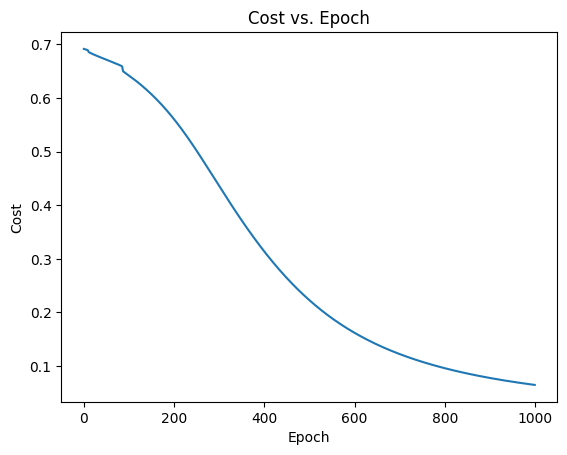

In [ ]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs. Epoch")
plt.show()